In [ ]:
conda install -c conda-forge wordcloud

In [ ]:
conda install -c conda-forge textblob

In [ ]:
conda install -c conda-forge gensim

In [1]:
#load all libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import spacy
import string
import seaborn as sns

C:\Users\kenai\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Getting the Data

## pandas review

In [2]:
# loading data as a pandas dataframe
data = pd.read_csv('C:/Users/kenai/Network_data.csv')

In [3]:
data.head(5)

,PMID,PMCID,WOS_NO,Keys,Title,Abstract,Publication_Years,Journal Title,NLM Catalog MeSH,AuthorLastName1,...,AuthorAff7,AuthorLastName8,AuthorFirstName8,AuthorAff8,AuthorLastName9,AuthorFirstName9,AuthorAff9,AuthorLastName10,AuthorFirstName10,AuthorAff10
0,NaN,NaN,NaN,92CVENCV,Protozoa as Indicators of Pollution,NaN,1952,THE SCIENTIFIC MONTHLY,NaN,Mohr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11509411.0,1120965,NaN,MUU99AIX,Bacteriotherapy: The Time Has Come: Bacterial ...,NaN,2001,BMJ: BRITISH MEDICAL JOURNAL,Thoracic Diseases*,Huovinen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.68609E+11,NaN,5BNSJGHD,Commensal host-bacterial relationships in the gut,One potential outcome of the adaptive coevolut...,2001,SCIENCE,Gastrointestinal Diseases*,Hooper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,FAX6B5KX,Why We Don't Get Sick: The Within-Host Populat...,"To pathogenic microparasites (viruses, bacteri...",2001,SCIENCE,Gastrointestinal Diseases*,Levin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12424706.0,NaN,1.795880e+11,5EMUTG3X,"New technologies, human-microbe interactions, ...",Evidence suggests that a significant number of...,2002,JOURNAL OF INVERTEBRATE PATHOLOGY,Microbiology*\nMolecular Biology*,Relman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.count() # number of non-missing values

PMID                    794
PMCID                   712
WOS_NO                  119
Keys                    853
Title                   853
Abstract                764
Publication_Years       853
Journal Title           853
NLM Catalog MeSH        843
AuthorLastName1         849
AuthorFirstName1        847
AuthorAff1              843
Error Column              0
Error Type                0
Method Used               0
AuthorLastName_Last     763
AuthorFirstName_Last    763
AuthorAffLast           763
AuthorLastName2         661
AuthorFirstName2        661
AuthorAff2              661
AuthorLastName3         545
AuthorFirstName3        545
AuthorAff3              545
AuthorLastName4         449
AuthorFirstName4        449
AuthorAff4              449
AuthorLastName5         379
AuthorFirstName5        379
AuthorAff5              379
AuthorLastName6         317
AuthorFirstName6        317
AuthorAff6              317
AuthorLastName7         259
AuthorFirstName7        259
AuthorAff7          

In [5]:
data.sum()

PMID                                                       1.56162e+10
WOS_NO                                                     3.09659e+13
Keys                 92CVENCVMUU99AIX5BNSJGHDFAX6B5KX5EMUTG3XA4MVHR...
Title                Protozoa as Indicators of PollutionBacteriothe...
Publication_Years                                              1713545
Journal Title        THE SCIENTIFIC MONTHLYBMJ: BRITISH MEDICAL JOU...
Error Column                                                         0
Error Type                                                           0
Method Used                                                          0
dtype: object

In [6]:
data.dropna(how='all') # only drops rows if they are all na

,PMID,PMCID,WOS_NO,Keys,Title,Abstract,Publication_Years,Journal Title,NLM Catalog MeSH,AuthorLastName1,...,AuthorAff7,AuthorLastName8,AuthorFirstName8,AuthorAff8,AuthorLastName9,AuthorFirstName9,AuthorAff9,AuthorLastName10,AuthorFirstName10,AuthorAff10
0,NaN,NaN,NaN,92CVENCV,Protozoa as Indicators of Pollution,NaN,1952,THE SCIENTIFIC MONTHLY,NaN,Mohr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11509411.0,1120965,NaN,MUU99AIX,Bacteriotherapy: The Time Has Come: Bacterial ...,NaN,2001,BMJ: BRITISH MEDICAL JOURNAL,Thoracic Diseases*,Huovinen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.68609E+11,NaN,5BNSJGHD,Commensal host-bacterial relationships in the gut,One potential outcome of the adaptive coevolut...,2001,SCIENCE,Gastrointestinal Diseases*,Hooper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,FAX6B5KX,Why We Don't Get Sick: The Within-Host Populat...,"To pathogenic microparasites (viruses, bacteri...",2001,SCIENCE,Gastrointestinal Diseases*,Levin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12424706.0,NaN,1.795880e+11,5EMUTG3X,"New technologies, human-microbe interactions, ...",Evidence suggests that a significant number of...,2002,JOURNAL OF INVERTEBRATE PATHOLOGY,Microbiology*\nMolecular Biology*,Relman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,20857523.0,PMC2945484,NaN,FVA5EVQ2,Association of symptoms with gastrointestinal ...,AIM: To investigate the correlations between s...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Malinen,...,University of Eastern Finland,von Wright,Atte Johannes,University of Eastern Finland,NaN,NaN,NaN,NaN,NaN,NaN
849,20806429.0,PMC2932916,NaN,VIBHKRIC,Design of 16S rRNA gene primers for 454 pyrose...,AIM: To design and validate broad-range 16S rR...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Nossa,...,Lawrence Berkeley National Laboratory,Malamud,Daniel,New York University,Poles,Michael A,New York University,NaN,NaN,NaN
850,20632441.0,PMC2904885,NaN,PTFP375S,Effects of four Bifidobacteria on obesity in h...,AIM: To compare the effects of four Bifidobact...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Yin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851,20101763.0,PMC2811790,NaN,TC9WRFH8,Probiotics and gut health: A special focus on ...,Probiotic bacteria have well-established benef...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Gratz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.dropna # drop any row with an na value

<bound method DataFrame.dropna of            PMID        PMCID        WOS_NO      Keys  \
0           NaN          NaN           NaN  92CVENCV   
1    11509411.0      1120965           NaN  MUU99AIX   
2           NaN  1.68609E+11           NaN  5BNSJGHD   
3           NaN          NaN           NaN  FAX6B5KX   
4    12424706.0          NaN  1.795880e+11  5EMUTG3X   
..          ...          ...           ...       ...   
848  20857523.0   PMC2945484           NaN  FVA5EVQ2   
849  20806429.0   PMC2932916           NaN  VIBHKRIC   
850  20632441.0   PMC2904885           NaN  PTFP375S   
851  20101763.0   PMC2811790           NaN  TC9WRFH8   
852  20458757.0   PMC2868213           NaN  PWBCX9Q2   

                                                 Title  \
0                  Protozoa as Indicators of Pollution   
1    Bacteriotherapy: The Time Has Come: Bacterial ...   
2    Commensal host-bacterial relationships in the gut   
3    Why We Don't Get Sick: The Within-Host Populat...   
4  

In [8]:
data.fillna(0) # fill nas with a fixed value

,PMID,PMCID,WOS_NO,Keys,Title,Abstract,Publication_Years,Journal Title,NLM Catalog MeSH,AuthorLastName1,...,AuthorAff7,AuthorLastName8,AuthorFirstName8,AuthorAff8,AuthorLastName9,AuthorFirstName9,AuthorAff9,AuthorLastName10,AuthorFirstName10,AuthorAff10
0,0.0,0,0.000000e+00,92CVENCV,Protozoa as Indicators of Pollution,0,1952,THE SCIENTIFIC MONTHLY,0,Mohr,...,0,0,0,0,0,0,0,0,0,0
1,11509411.0,1120965,0.000000e+00,MUU99AIX,Bacteriotherapy: The Time Has Come: Bacterial ...,0,2001,BMJ: BRITISH MEDICAL JOURNAL,Thoracic Diseases*,Huovinen,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.68609E+11,0.000000e+00,5BNSJGHD,Commensal host-bacterial relationships in the gut,One potential outcome of the adaptive coevolut...,2001,SCIENCE,Gastrointestinal Diseases*,Hooper,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0.000000e+00,FAX6B5KX,Why We Don't Get Sick: The Within-Host Populat...,"To pathogenic microparasites (viruses, bacteri...",2001,SCIENCE,Gastrointestinal Diseases*,Levin,...,0,0,0,0,0,0,0,0,0,0
4,12424706.0,0,1.795880e+11,5EMUTG3X,"New technologies, human-microbe interactions, ...",Evidence suggests that a significant number of...,2002,JOURNAL OF INVERTEBRATE PATHOLOGY,Microbiology*\nMolecular Biology*,Relman,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,20857523.0,PMC2945484,0.000000e+00,FVA5EVQ2,Association of symptoms with gastrointestinal ...,AIM: To investigate the correlations between s...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Malinen,...,University of Eastern Finland,von Wright,Atte Johannes,University of Eastern Finland,0,0,0,0,0,0
849,20806429.0,PMC2932916,0.000000e+00,VIBHKRIC,Design of 16S rRNA gene primers for 454 pyrose...,AIM: To design and validate broad-range 16S rR...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Nossa,...,Lawrence Berkeley National Laboratory,Malamud,Daniel,New York University,Poles,Michael A,New York University,0,0,0
850,20632441.0,PMC2904885,0.000000e+00,PTFP375S,Effects of four Bifidobacteria on obesity in h...,AIM: To compare the effects of four Bifidobact...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Yin,...,0,0,0,0,0,0,0,0,0,0
851,20101763.0,PMC2811790,0.000000e+00,TC9WRFH8,Probiotics and gut health: A special focus on ...,Probiotic bacteria have well-established benef...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Gratz,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# interprolation method 
data.fillna(method='ffill')

,PMID,PMCID,WOS_NO,Keys,Title,Abstract,Publication_Years,Journal Title,NLM Catalog MeSH,AuthorLastName1,...,AuthorAff7,AuthorLastName8,AuthorFirstName8,AuthorAff8,AuthorLastName9,AuthorFirstName9,AuthorAff9,AuthorLastName10,AuthorFirstName10,AuthorAff10
0,NaN,NaN,NaN,92CVENCV,Protozoa as Indicators of Pollution,NaN,1952,THE SCIENTIFIC MONTHLY,NaN,Mohr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11509411.0,1120965,NaN,MUU99AIX,Bacteriotherapy: The Time Has Come: Bacterial ...,NaN,2001,BMJ: BRITISH MEDICAL JOURNAL,Thoracic Diseases*,Huovinen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11509411.0,1.68609E+11,NaN,5BNSJGHD,Commensal host-bacterial relationships in the gut,One potential outcome of the adaptive coevolut...,2001,SCIENCE,Gastrointestinal Diseases*,Hooper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11509411.0,1.68609E+11,NaN,FAX6B5KX,Why We Don't Get Sick: The Within-Host Populat...,"To pathogenic microparasites (viruses, bacteri...",2001,SCIENCE,Gastrointestinal Diseases*,Levin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12424706.0,1.68609E+11,1.795880e+11,5EMUTG3X,"New technologies, human-microbe interactions, ...",Evidence suggests that a significant number of...,2002,JOURNAL OF INVERTEBRATE PATHOLOGY,Microbiology*\nMolecular Biology*,Relman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,20857523.0,PMC2945484,2.846870e+11,FVA5EVQ2,Association of symptoms with gastrointestinal ...,AIM: To investigate the correlations between s...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Malinen,...,University of Eastern Finland,von Wright,Atte Johannes,University of Eastern Finland,Nizet,Victor,University of California,Kim,Judy E.,University of California
849,20806429.0,PMC2932916,2.846870e+11,VIBHKRIC,Design of 16S rRNA gene primers for 454 pyrose...,AIM: To design and validate broad-range 16S rR...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Nossa,...,Lawrence Berkeley National Laboratory,Malamud,Daniel,New York University,Poles,Michael A,New York University,Kim,Judy E.,University of California
850,20632441.0,PMC2904885,2.846870e+11,PTFP375S,Effects of four Bifidobacteria on obesity in h...,AIM: To compare the effects of four Bifidobact...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Yin,...,Lawrence Berkeley National Laboratory,Malamud,Daniel,New York University,Poles,Michael A,New York University,Kim,Judy E.,University of California
851,20101763.0,PMC2811790,2.846870e+11,TC9WRFH8,Probiotics and gut health: A special focus on ...,Probiotic bacteria have well-established benef...,2010,WORLD JOURNAL OF GASTROENTEROLOGY : WJG,Gastrointestinal Diseases*,Gratz,...,Lawrence Berkeley National Laboratory,Malamud,Daniel,New York University,Poles,Michael A,New York University,Kim,Judy E.,University of California


### Counting number of publications by year

In [10]:
pub_records = data['Publication_Years'].value_counts()
pub_records

2010    325
2009    266
2008    185
2007     47
2006     16
2005      6
2001      3
2002      2
2004      1
2003      1
1952      1
Name: Publication_Years, dtype: int64

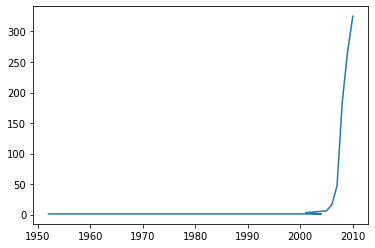

In [11]:
pub_records.plot()

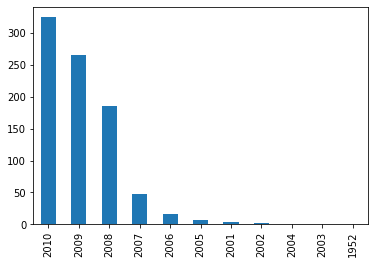

In [12]:
pub_records.plot.bar()

### Data- Combine and Reshape to create a Corpus (format 1)

In [14]:
# create series of data from a column
data2 = data["Publication_Years"]

In [15]:
data2

0      1952
1      2001
2      2001
3      2001
4      2002
       ... 
848    2010
849    2010
850    2010
851    2010
852    2010
Name: Publication_Years, Length: 853, dtype: int64

In [16]:
# create another series of data from another column
data3= data['Title']

In [17]:
# original data set is unchanged, but now have data
pub_year= pd.concat([data2, data3], axis=1)
pub_year

,Publication_Years,Title
0,1952,Protozoa as Indicators of Pollution
1,2001,Bacteriotherapy: The Time Has Come: Bacterial ...
2,2001,Commensal host-bacterial relationships in the gut
3,2001,Why We Don't Get Sick: The Within-Host Populat...
4,2002,"New technologies, human-microbe interactions, ..."
...,...,...
848,2010,Association of symptoms with gastrointestinal ...
849,2010,Design of 16S rRNA gene primers for 454 pyrose...
850,2010,Effects of four Bifidobacteria on obesity in h...
851,2010,Probiotics and gut health: A special focus on ...


In [18]:
pub_year = pd.DataFrame(pub_year, columns=["Publication_Years", "Title"]).set_index('Publication_Years', drop=True)
pub_year

,Title
Publication_Years,
1952,Protozoa as Indicators of Pollution
2001,Bacteriotherapy: The Time Has Come: Bacterial ...
2001,Commensal host-bacterial relationships in the gut
2001,Why We Don't Get Sick: The Within-Host Populat...
2002,"New technologies, human-microbe interactions, ..."
...,...
2010,Association of symptoms with gastrointestinal ...
2010,Design of 16S rRNA gene primers for 454 pyrose...
2010,Effects of four Bifidobacteria on obesity in h...


### Cleaning data

In [19]:
pub_year[:1]

,Title
Publication_Years,
1952,Protozoa as Indicators of Pollution


In [20]:
pub_year[:-1]

,Title
Publication_Years,
1952,Protozoa as Indicators of Pollution
2001,Bacteriotherapy: The Time Has Come: Bacterial ...
2001,Commensal host-bacterial relationships in the gut
2001,Why We Don't Get Sick: The Within-Host Populat...
2002,"New technologies, human-microbe interactions, ..."
...,...
2010,Metagenomic analysis of the turkey gut RNA vir...
2010,Association of symptoms with gastrointestinal ...
2010,Design of 16S rRNA gene primers for 454 pyrose...


In [21]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # get rid of anything in square brackets, usually citatinos
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # get rid of punctuation
    text = re.sub('\w*\d\w*', '', text) # get rid of numbers
    return text

round1 = lambda x: clean_text_round1(x)

In [22]:
data_clean = pd.DataFrame(pub_year.Title.apply(round1))

In [23]:
data_clean

,Title
Publication_Years,
1952,protozoa as indicators of pollution
2001,bacteriotherapy the time has come bacterial in...
2001,commensal hostbacterial relationships in the gut
2001,why we dont get sick the withinhost population...
2002,new technologies humanmicrobe interactions and...
...,...
2010,association of symptoms with gastrointestinal ...
2010,design of rrna gene primers for pyrosequenci...
2010,effects of four bifidobacteria on obesity in h...


In [24]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [25]:
data_clean = pd.DataFrame(data_clean.Title.apply(round2))
data_clean

,Title
Publication_Years,
1952,protozoa as indicators of pollution
2001,bacteriotherapy the time has come bacterial in...
2001,commensal hostbacterial relationships in the gut
2001,why we dont get sick the withinhost population...
2002,new technologies humanmicrobe interactions and...
...,...
2010,association of symptoms with gastrointestinal ...
2010,design of rrna gene primers for pyrosequenci...
2010,effects of four bifidobacteria on obesity in h...


### Organizing the data to create DTM (format 2)

In [26]:
# let's pickle this for later use
data_clean.to_pickle('pub_year_corpus.pkl')

In [27]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # removes stopwords, can use this to include bigrams
data_cv = cv.fit_transform(data_clean.Title)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abc,ability,abscess,absorbed,abundance,abundances,abundant,accelerate,access,accumulibacter,...,yogurt,young,zebrafish,zodletone,zone,αglucosidase,αmannosidases,βelimination,δtoxin,κopioid
Publication_Years,,,,,,,,,,,,,,,,,,,,,
1952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Let's pickle it for later use
data_dtm.to_pickle("pub_year_dtm.pkl")

### EDA

In [29]:
# read in the DTM

data = pd.read_pickle('pub_year_dtm.pkl')
data = data.transpose() # term document matrix, aggregations easier
# harder to do things across rows than across columns
data.head()

Publication_Years,1952,2001,2001,2001,2002,2002,2003,2004,2005,2005,...,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
abc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abscess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absorbed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abundance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data.head(3)

Publication_Years,1952,2001,2001,2001,2002,2002,2003,2004,2005,2005,...,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
abc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abscess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# let's merge all the counts by year
data = data.groupby(level=0, axis=1).sum()
data

Publication_Years,1952,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
abc,0,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,1
abscess,0,0,0,0,0,0,0,0,0,1,0
absorbed,0,0,0,0,0,0,0,0,0,0,1
abundance,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
αglucosidase,0,0,0,0,0,0,0,0,0,0,1
αmannosidases,0,0,0,0,0,0,0,0,0,0,1
βelimination,0,0,0,0,0,0,0,0,0,0,1
δtoxin,0,0,0,0,0,0,0,0,0,0,1


In [32]:
# Find the top 30 
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{1952: [('protozoa', 1),
  ('indicators', 1),
  ('pollution', 1),
  ('κopioid', 0),
  ('flexible', 0),
  ('flavefaciens', 0),
  ('fitness', 0),
  ('fish', 0),
  ('firmicutes', 0),
  ('fingerprints', 0),
  ('fingerprinting', 0),
  ('finescale', 0),
  ('findings', 0),
  ('finds', 0),
  ('fluctuation', 0),
  ('filtering', 0),
  ('filamentous', 0),
  ('fiends', 0),
  ('fields', 0),
  ('field', 0),
  ('fibrosis', 0),
  ('fibrolyticproteinencoding', 0),
  ('flora', 0),
  ('flx', 0),
  ('fibrogenesis', 0),
  ('focal', 0),
  ('formicidae', 0),
  ('formed', 0),
  ('formation', 0),
  ('forgotten', 0)],
 2001: [('bacterial', 2),
  ('relationships', 1),
  ('interference', 1),
  ('prevention', 1),
  ('withinhost', 1),
  ('dont', 1),
  ('come', 1),
  ('population', 1),
  ('commensal', 1),
  ('therapy', 1),
  ('gut', 1),
  ('time', 1),
  ('hostbacterial', 1),
  ('bacteriotherapy', 1),
  ('infections', 1),
  ('sick', 1),
  ('approach', 1),
  ('dynamics', 1),
  ('attractive', 1),
  ('increasingly', 1),

In [33]:
# Print the top 15 words said for each year
for year, top_words in top_dict.items():
    print(year)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

1952
protozoa, indicators, pollution, κopioid, flexible, flavefaciens, fitness, fish, firmicutes, fingerprints, fingerprinting, finescale, findings, finds
---
2001
bacterial, relationships, interference, prevention, withinhost, dont, come, population, commensal, therapy, gut, time, hostbacterial, bacteriotherapy
---
2002
interactions, humanmicrobe, search, previously, technologies, new, microbes, pathogens, living, unrecognized, firmicutes, flavefaciens, fitness, fish
---
2003
honor, thy, symbionts, κopioid, firmicutes, fluctuation, flora, flexible, flavefaciens, fitness, fish, fingerprints, focal, fingerprinting
---
2004
insects, gut, nonpathogenic, bacteria, interactions, fiends, field, fibrosis, flexible, flavefaciens, fitness, fish, firmicutes, fingerprints
---
2005
microbial, intestinal, tract, gastrointestinal, intergenic, pcr, ribosomal, adherent, radiosensitivity, assays, development, plant, probiotic, revealed
---
2006
gut, human, bacterial, diversity, microbiota, community, m

In [34]:
# let's pickle this for later use
data.to_pickle('pub_year_corpus.pkl')

In [35]:
# lets look at the most common top words, might and see if we need to add them to a stop list
from collections import Counter

# pull out top words
words = []
for year in data.columns:
    top = [word for (word, count) in top_dict[year]]
    for t in top:
        words.append(t)

words

['protozoa',
 'indicators',
 'pollution',
 'κopioid',
 'flexible',
 'flavefaciens',
 'fitness',
 'fish',
 'firmicutes',
 'fingerprints',
 'fingerprinting',
 'finescale',
 'findings',
 'finds',
 'fluctuation',
 'filtering',
 'filamentous',
 'fiends',
 'fields',
 'field',
 'fibrosis',
 'fibrolyticproteinencoding',
 'flora',
 'flx',
 'fibrogenesis',
 'focal',
 'formicidae',
 'formed',
 'formation',
 'forgotten',
 'bacterial',
 'relationships',
 'interference',
 'prevention',
 'withinhost',
 'dont',
 'come',
 'population',
 'commensal',
 'therapy',
 'gut',
 'time',
 'hostbacterial',
 'bacteriotherapy',
 'infections',
 'sick',
 'approach',
 'dynamics',
 'attractive',
 'increasingly',
 'finescale',
 'finds',
 'fingerprints',
 'findings',
 'filtering',
 'firmicutes',
 'filamentous',
 'fish',
 'fiends',
 'fields',
 'interactions',
 'humanmicrobe',
 'search',
 'previously',
 'technologies',
 'new',
 'microbes',
 'pathogens',
 'living',
 'unrecognized',
 'firmicutes',
 'flavefaciens',
 'fitness'

In [36]:
# let's aggregate this list, and identify the most common words and in how many years they occur
Counter(words).most_common()

[('gut', 7),
 ('microbial', 6),
 ('human', 6),
 ('fish', 5),
 ('firmicutes', 5),
 ('fingerprints', 5),
 ('finescale', 5),
 ('findings', 5),
 ('finds', 5),
 ('filtering', 5),
 ('filamentous', 5),
 ('fiends', 5),
 ('fields', 5),
 ('flora', 5),
 ('bacterial', 5),
 ('intestinal', 5),
 ('analysis', 5),
 ('microbiota', 5),
 ('disease', 5),
 ('sequence', 5),
 ('microbiome', 5),
 ('κopioid', 4),
 ('flexible', 4),
 ('flavefaciens', 4),
 ('fitness', 4),
 ('fingerprinting', 4),
 ('forgotten', 4),
 ('interactions', 4),
 ('new', 4),
 ('bacteria', 4),
 ('sequencing', 4),
 ('diversity', 4),
 ('community', 4),
 ('metabolic', 4),
 ('role', 4),
 ('fluctuation', 3),
 ('fibrosis', 3),
 ('formicidae', 3),
 ('formed', 3),
 ('formation', 3),
 ('reveals', 3),
 ('metagenomics', 3),
 ('gene', 3),
 ('metagenomic', 3),
 ('field', 2),
 ('fibrolyticproteinencoding', 2),
 ('flx', 2),
 ('focal', 2),
 ('hostbacterial', 2),
 ('approach', 2),
 ('microbes', 2),
 ('forensic', 2),
 ('gastrointestinal', 2),
 ('ribosomal', 2

In [37]:
# if low word count or, if it occcurs less than 1 time remove it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count <= 1]
add_stop_words

['protozoa',
 'indicators',
 'pollution',
 'fibrogenesis',
 'relationships',
 'interference',
 'prevention',
 'withinhost',
 'dont',
 'come',
 'population',
 'commensal',
 'therapy',
 'time',
 'bacteriotherapy',
 'infections',
 'sick',
 'dynamics',
 'attractive',
 'increasingly',
 'humanmicrobe',
 'search',
 'previously',
 'technologies',
 'pathogens',
 'living',
 'unrecognized',
 'foregut',
 'honor',
 'thy',
 'symbionts',
 'focus',
 'forces',
 'forms',
 'insects',
 'nonpathogenic',
 'forage',
 'tract',
 'intergenic',
 'pcr',
 'adherent',
 'radiosensitivity',
 'assays',
 'plant',
 'realtime',
 'biomass',
 'resistance',
 'quantification',
 'signaling',
 'encoding',
 'intestine',
 'mutualism',
 'regulation',
 'herbivore',
 'tetracycline',
 'symbiont',
 'host',
 'atrophic',
 'microflora',
 'contribution',
 'faecal',
 'hybrid',
 'immune',
 'impact',
 'prominent',
 'improved',
 'phenotype',
 'expand',
 'systems',
 'biology',
 'global',
 'phenotypes',
 'genomic',
 'metabonomics',
 'complex',

In [38]:
# update DTM with new list of stop words
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

ValueError: Length mismatch: Expected axis has 1 elements, new values have 12 elements